## API 불러오기

In [1]:
# 기본 API
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
sns.set()
%matplotlib inline

# 전처리 API
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# 경고메세지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 중간에 잘리는 컬럼없이 100개까지 Print / 소수점은 5번째까지
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.5f}'.format

In [3]:
# 모델적용 API
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import keras
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [4]:
#폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['C:\\Windows\\Fonts\\LTYPEB.TTF',
 'C:\\Windows\\Fonts\\TCCM____.TTF',
 'C:\\Windows\\Fonts\\ERASDEMI.TTF',
 'C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\OLDENGL.TTF',
 'C:\\Windows\\Fonts\\NanumGothicExtraBold.ttf',
 'C:\\Windows\\Fonts\\LTYPEBO.TTF',
 'C:\\Windows\\Fonts\\TEMPSITC.TTF',
 'C:\\Windows\\Fonts\\simsun.ttc',
 'C:\\Windows\\Fonts\\segoesc.ttf',
 'C:\\Windows\\Fonts\\KoPubDotumLight.ttf',
 'C:\\Windows\\Fonts\\seguisli.ttf',
 'C:\\Windows\\Fonts\\CASTELAR.TTF',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\NIAGENG.TTF',
 'C:\\Windows\\Fonts\\NGULIM.TTF',
 'C:\\Windows\\Fonts\\ROCKEB.TTF',
 'C:\\Windows\\Fonts\\HANBatangB.ttf',
 'C:\\Windows\\Fonts\\SCHLBKB.TTF',
 'C:\\Windows\\Fonts\\H2MJSM.TTF',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\trebucit.ttf',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\OCRAEXT.TTF',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\KoPubDotumMedium.ttf',
 'C:\\Windows\\Fonts\\ebri

In [5]:
import platform 

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

## XGBoost Regression

In [6]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
xgb = xgboost.XGBRegressor()

In [12]:
from sklearn.datasets import load_boston
import xgboost
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.3)

xgb_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=7,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.75,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

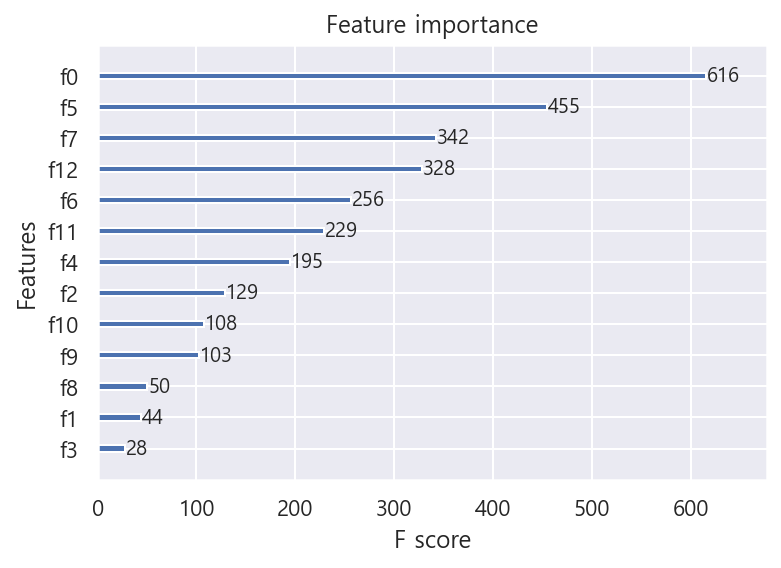

In [13]:
xgboost.plot_importance(xgb_model)

In [20]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target ,test_size=0.3)

In [34]:
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def XGBRegression(x_train,x_test,y_train,y_test):
    xgb = xgboost.XGBRegressor(base_score=0.5,
                              booster='gblinear',
                              colsample_bylevel=1, 
                              colsample_bynode=1,
                              colsample_bytree=1, # 변경할 수 있도록 변경 float
                              gamma=0, # 변경할 수 있도록 변경 integer
                              learning_rate=0.3,
                              max_delta_step=0,
                              max_depth=6, #변경할 수 있도록 변경 integer
                              min_child_weight=1,
                              monotone_constraints='()',
                              n_estimators=100, # 변경할 수 있도록 변경 integer
                              num_parallel_tree=1,
                              random_state=0,
                              reg_alpha=0, # 변경할 수 있도록 변경 integer
                              reg_lambda=1, # 변경할 수 있도록 변경 integer
                              scale_pos_weight=1, # 변경할 수 있도록 변경 float
                              subsample=1,
                              validate_parameters=1,
                              verbosity=None
                             )
    # 모델 적용
    xgb.fit(x_train,y_train)
    # 예측값 생성
    xgb_pred = xgb.predict(x_test)
    
    return xgb, xgb_pred

In [35]:
xgb, xgb_pred = XGBRegression(X_train,X_test,y_train,y_test)

[11:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { colsample_bylevel, colsample_bynode, colsample_bytree, gamma, max_delta_step, max_depth, min_child_weight, monotone_constraints, num_parallel_tree, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [36]:
r_sq = xgb_model.score(X_train, y_train)

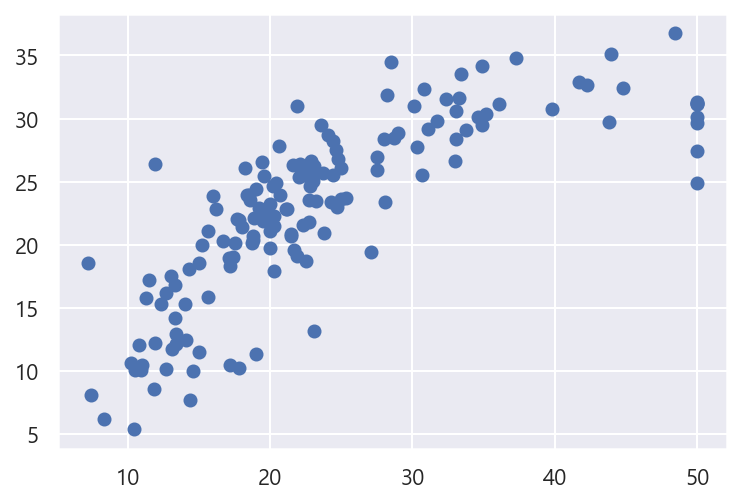

In [41]:
plt.scatter(y_test,xgb_pred)

In [37]:
xgb.coef_

array([-0.100225 ,  0.0786005, -0.0705148,  0.279707 ,  0.0702417,
        1.52602  ,  0.0411768, -0.4796   ,  0.212702 , -0.0124239,
        0.151215 ,  0.0222426, -0.611911 ])

In [39]:
xgb.

array([11.3476])

In [32]:
r_sq

0.9667433601154102

In [30]:
y_test

array([50. , 21.2, 27.1, 35.2, 36.1, 14.6, 13.3, 37.3, 18.8, 22.4, 17.7,
       34.9, 30.1, 22.9, 20.3, 30.8, 48.5, 13.4, 50. , 50. , 30.7, 33. ,
       24.6, 22.1, 20.2, 15.2, 21.5, 28.7, 22.5, 15.6, 20.4, 24.3, 10.9,
       14.1, 18.9, 39.8, 22.3, 22.8, 31.7, 13.3, 29. , 11.9, 23.1, 24.7,
       31.1, 22.6, 13.4, 14.4, 14.3, 23. , 32.4, 20. , 13. , 10.2, 16. ,
       23.7, 27.5, 18.6, 12.7, 24.4, 16.2, 17.2, 50. , 20. , 22. , 24.1,
       23.2, 33.8, 27.5, 20.7, 30.3, 33.1, 17.8, 21.9, 13.1, 33.4, 15. ,
       23.8, 19.5, 50. , 10.4, 20. , 20.6, 22.8, 24.8, 23. , 25.3, 28.2,
       19.2, 34.9,  7.2, 25. , 28.1, 17.8, 21.7, 33.1, 28.5, 16.7, 12.7,
       22.2, 12.3, 20.3, 42.3, 18.8, 18. , 21.5, 11.3, 22.7, 18.7, 21.9,
       23.6, 14. , 18.2, 50. , 25. , 23.1, 19. , 18.5, 11. , 10.8, 44. ,
       33.3, 11.5, 11.9,  8.3, 22.9, 50. , 17.4, 17.5, 19.6, 34.6, 44.8,
       15.6, 20.3, 18.4, 19.6, 17.2, 21.6, 19. , 10.5, 15. , 17.1, 22.7,
       50. ,  7.4, 11.8, 41.7, 19.4, 24.4, 21.1, 43

In [29]:
xgb_pred

array([42.019844 , 22.78938  , 18.864878 , 34.519943 , 31.392065 ,
       13.16671  , 16.620855 , 35.587814 , 17.850695 , 23.520462 ,
       19.675385 , 34.883385 , 31.916271 , 24.35707  , 22.444792 ,
       28.170649 , 49.758747 , 15.308601 , 41.9598   , 48.828037 ,
       27.55644  , 31.95331  , 24.473377 , 25.200468 , 22.115429 ,
       17.03139  , 19.33714  , 32.83123  , 20.469685 , 15.404869 ,
       21.492493 , 21.8287   , 14.182153 , 14.816367 , 21.64465  ,
       37.30631  , 21.424253 , 26.449986 , 33.575584 , 14.143833 ,
       32.961544 , 13.94816  , 20.142344 , 22.16871  , 31.37526  ,
       23.582758 , 14.106099 , 11.539047 , 17.333948 , 22.38656  ,
       31.024868 , 19.415367 , 14.897144 , 14.36681  , 18.696733 ,
       22.875257 , 23.522635 , 20.801634 , 16.079859 , 25.651842 ,
       19.242077 , 19.84985  , 46.64822  , 17.876335 , 23.909447 ,
       22.527266 , 20.172361 , 35.875927 , 24.888803 , 23.232311 ,
       30.608032 , 30.48669  , 15.163674 , 17.396809 , 16.8432